# US Visas

In [35]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

## Read CSV

In [36]:
visas_df = pd.read_csv("data/us_perm_visas.csv")

C:\Users\andre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Display data types

In [37]:
visas_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Data columns (total 154 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   add_these_pw_job_title_9089             object 
 1   agent_city                              object 
 2   agent_firm_name                         object 
 3   agent_state                             object 
 4   application_type                        object 
 5   case_no                                 object 
 6   case_number                             object 
 7   case_received_date                      object 
 8   case_status                             object 
 9   class_of_admission                      object 
 10  country_of_citizenship                  object 
 11  country_of_citzenship                   object 
 12  decision_date                           object 
 13  employer_address_1                      object 
 14  employer_address_2                 

## Count of columns

In [38]:
print(len(visas_df.columns))

154


## Print infos

In [39]:
def print_info_of_str_column(column_object):
    print('###################################')
    print(column_object)
    print('')
    #display(Markdown("# " + column_object))
    print((visas_df[column_object].value_counts()))
    print('###################################')
    print('')

In [40]:
headers = list(visas_df)
for x in list(visas_df):
    print_info_of_str_column(headers.pop(0))


###################################
add_these_pw_job_title_9089

Software Developers, Applications                  10042
Computer Systems Analysts                           3040
Software Developers, Systems Software               1930
Electronics Engineers, Except Computer              1493
Computer Systems Analyst                             909
                                                   ...  
Assistant Professor, Coastal Geology                   1
Aluminum Wheel Polisher                                1
Commercial Sales Specialist                            1
Senior Network Engineer                                1
ENGLISH LANGUAGE AND LITERATURE TEACHERS, POSTS        1
Name: add_these_pw_job_title_9089, Length: 4276, dtype: int64
###################################

###################################
agent_city

New York         19359
San Francisco    18603
Boston            8591
Santa Clara       7769
Chicago           7555
                 ...  
WALNUT               1


## Merge Columns

In this case: case_no, case_number

In [41]:
cols = [['case_no', 'case_number']]

Values are getting concatenated.

In [42]:
visas_df['Case_No_merged'] = visas_df['case_no'].fillna('') + visas_df['case_number'].fillna('')

Check if there are dublicates.

In [43]:
visas_df['Case_No_merged'].value_counts()

A-14160-76066    3
A-11255-05058    2
A-15245-13896    2
A-13064-45472    2
A-15236-10907    2
                ..
A-12279-05032    1
A-14287-15642    1
A-13308-10331    1
A-16055-76457    1
A-11138-79203    1
Name: Case_No_merged, Length: 373025, dtype: int64

Dublicate Values are existing - CaseNo is no key value.

Check the length of all concatenated strings. If the merging process was succesful, there should be no length over 13.
Also der shoould be no NaN or Null values.

In [44]:
visas_df['Case_No_merged'].str.len().value_counts()

13    374362
Name: Case_No_merged, dtype: int64

In [45]:
print('NaN values in case_number:')
print(visas_df['case_number'].isna().sum())
print('NaN values in case_no:')
print(visas_df['case_no'].isna().sum())
print('NaN Values combined:')
print(visas_df['case_number'].isna().sum() + visas_df['case_no'].isna().sum())


NaN values in case_number:
135269
NaN values in case_no:
239093
NaN Values combined:
374362


In [46]:
visas_df['Case_No_merged'].str.len()

0         13
1         13
2         13
3         13
4         13
          ..
374357    13
374358    13
374359    13
374360    13
374361    13
Name: Case_No_merged, Length: 374362, dtype: int64

In [47]:
visas_df['Case_No_merged'].isna().sum()

0

CaseNumber is completely filled. No Null Values.

<AxesSubplot:>

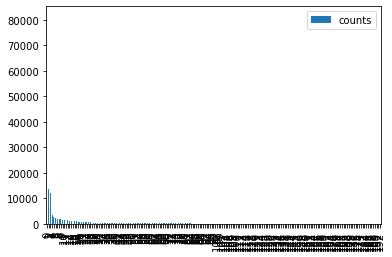

In [48]:
unique_values_df = visas_df['fw_info_birth_country'].value_counts().rename_axis('unique values').reset_index(name='counts')
unique_values_df
unique_values_df.sort_values(by='counts', ascending = False).plot.bar()

In [ ]:


unique_values_df = visas_df['naics_title'].value_counts().rename_axis('unique values').reset_index(name='counts')
unique_values_df
unique_values_df.sort_values(by='counts', ascending = False).plot.bar()

<AxesSubplot:>

In [ ]:
unique_values_df = visas_df['case_status'].value_counts().rename_axis('unique values').reset_index(name='counts')
#unique_values_df = visas_df['case_status'].value_counts().rename_axis('unique values').reset_index(level=0, inplace=True)

print(unique_values_df)
unique_values_df.sort_values(by='counts', ascending = False).plot(kind='bar', x='unique values', y='counts', legend=None, title='Ice Cream Sales')




In [ ]:
unique_values_df.plot(kind='pie', labels=unique_values_df['unique values'], y='counts', legend=None, autopct='%.2f%%', title='Ice Cream Sales')
plt.tight_layout()
plt.show()
